In [2]:
#Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv(r"C:\Users\sruth\Downloads\dataset_group.csv")

In [4]:
df.head()

,Date,Order_id,Product
0,2018-01-01,1,yogurt
1,2018-01-01,1,pork
2,2018-01-01,1,sandwich bags
3,2018-01-01,1,lunch meat
4,2018-01-01,1,all- purpose


In [5]:
df.tail()

,Date,Order_id,Product
20636,2020-02-25,1138,soda
20637,2020-02-25,1138,paper towels
20638,2020-02-26,1139,soda
20639,2020-02-26,1139,laundry detergent
20640,2020-02-26,1139,shampoo


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


In [8]:
df.shape

(20641, 3)

In [9]:
df.nunique()

Date         603
Order_id    1139
Product       37
dtype: int64

In [10]:
df.duplicated().sum()

4730

In [11]:
df.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [12]:
df['Product'] = df['Product'].str.lower()
df

,Date,Order_id,Product
0,2018-01-01,1,yogurt
1,2018-01-01,1,pork
2,2018-01-01,1,sandwich bags
3,2018-01-01,1,lunch meat
4,2018-01-01,1,all- purpose
...,...,...,...
20636,2020-02-25,1138,soda
20637,2020-02-25,1138,paper towels
20638,2020-02-26,1139,soda
20639,2020-02-26,1139,laundry detergent


In [13]:
df=df.drop(df[df.Product == 'none'].index)
df

,Date,Order_id,Product
0,2018-01-01,1,yogurt
1,2018-01-01,1,pork
2,2018-01-01,1,sandwich bags
3,2018-01-01,1,lunch meat
4,2018-01-01,1,all- purpose
...,...,...,...
20636,2020-02-25,1138,soda
20637,2020-02-25,1138,paper towels
20638,2020-02-26,1139,soda
20639,2020-02-26,1139,laundry detergent


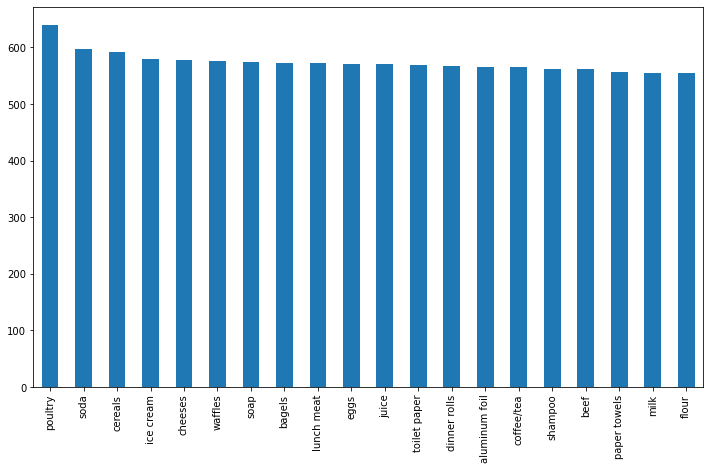

In [14]:

df['Product'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(12,7));

In [15]:
basket=df.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')
basket.head()

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [16]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [17]:
basket=basket.applymap(encode_zero_one)